In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
class BreastCancer(object):
    
    def __init__(self):
        from sklearn.datasets import load_breast_cancer
        df = load_breast_cancer()
        self.df = df
        return
        
    def preprocess_df(self):
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler

        df = self.df
        self.features = df['data']
        self.target = df['target']   
        
        X_train, X_test, self.y_train, self.y_test = train_test_split(self.features,
                                                                      self.target,test_size=0.25,random_state=0)
        sc = StandardScaler()
        
        self.X_train = sc.fit_transform(X_train)
        self.X_test = sc.fit_transform(X_test)

    def train_ML_models(self):
        # --- Logistic Regression ---
        
        classifier =LogisticRegression(random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_LogReg = classifier.predict(self.X_test)

        # --- KNN Classification ---
        
        classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_KNN = classifier.predict(self.X_test)

        # --- SVM Classification ---
        classifier = SVC(kernel='linear', random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_SVC = classifier.predict(self.X_test)

        # --- SVC Classification ---
        classifier = SVC(kernel='rbf',random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_SVCrbf = classifier.predict(self.X_test)

        # --- Naive bayes Gaussian Classification ---
        
        classifier = GaussianNB()
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_Gauss = classifier.predict(self.X_test)

        # --- Decision Tree Classification ---
        classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_tree = classifier.predict(self.X_test)

        # --- Random Forest Classification ---
        classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_randomforest = classifier.predict(self.X_test)

    def compute_performance_evals(self):
        from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, accuracy_score
        # Confusion matrix
        self.cm_LogisticRegression = confusion_matrix(self.y_test, self.y_pred_LogReg)
        self.cm_KNN = confusion_matrix(self.y_test, self.y_pred_KNN)
        self.cm_svckernel = confusion_matrix(self.y_test, self.y_pred_SVC)
        self.cm_svcrbf = confusion_matrix(self.y_test, self.y_pred_SVCrbf)
        self.cm_Gaussian = confusion_matrix(self.y_test, self.y_pred_Gauss)
        self.cm_decisiontree = confusion_matrix(self.y_test, self.y_pred_tree)
        self.cm_randomforest = confusion_matrix(self.y_test, self.y_pred_randomforest)

        # recall score
        self.rs_LogisticRegression = recall_score(self.y_test, self.y_pred_LogReg)
        self.rs_KNN = recall_score(self.y_test, self.y_pred_KNN)
        self.rs_svckernel = recall_score(self.y_test, self.y_pred_SVC)
        self.rs_svcrbf = recall_score(self.y_test, self.y_pred_SVCrbf)
        self.rs_Gaussian = recall_score(self.y_test, self.y_pred_Gauss)
        self.rs_decisiontree = recall_score(self.y_test, self.y_pred_tree)
        self.rs_randomforest = recall_score(self.y_test, self.y_pred_randomforest)
        
        # precision score
        self.ps_LogisticRegression = precision_score(self.y_test, self.y_pred_LogReg)
        self.ps_KNN = precision_score(self.y_test, self.y_pred_KNN)
        self.ps_svckernel = precision_score(self.y_test, self.y_pred_SVC)
        self.ps_svcrbf = precision_score(self.y_test, self.y_pred_SVCrbf)
        self.ps_Gaussian = precision_score(self.y_test, self.y_pred_Gauss)
        self.ps_decisiontree = precision_score(self.y_test, self.y_pred_tree)
        self.ps_randomforest = precision_score(self.y_test, self.y_pred_randomforest)
        
        # roc auc score
        self.roc_auc_LogisticRegression = roc_auc_score(self.y_test, self.y_pred_LogReg)
        self.roc_auc_KNN = roc_auc_score(self.y_test, self.y_pred_KNN)
        self.roc_auc_svckernel = roc_auc_score(self.y_test, self.y_pred_SVC)
        self.roc_auc_svcrbf = roc_auc_score(self.y_test, self.y_pred_SVCrbf)
        self.roc_auc_Gaussian = roc_auc_score(self.y_test, self.y_pred_Gauss)
        self.roc_auc_decisiontree = roc_auc_score(self.y_test, self.y_pred_tree)
        self.roc_auc_randomforest = roc_auc_score(self.y_test, self.y_pred_randomforest)
        
        # accuracy score
        self.acc_LogisticRegression = accuracy_score(self.y_test, self.y_pred_LogReg)
        self.acc_KNN = accuracy_score(self.y_test, self.y_pred_KNN)
        self.acc_svckernel = accuracy_score(self.y_test, self.y_pred_SVC)
        self.acc_svcrbf = accuracy_score(self.y_test, self.y_pred_SVCrbf)
        self.acc_Gaussian = accuracy_score(self.y_test, self.y_pred_Gauss)
        self.acc_decisiontree = accuracy_score(self.y_test, self.y_pred_tree)
        self.acc_randomforest = accuracy_score(self.y_test, self.y_pred_randomforest)

    def cross_val_pred(self):
        from sklearn.model_selection import cross_val_predict
        import scikitplot as skplt
        import matplotlib.pyplot as plt
        randomforest_cs = RandomForestClassifier(n_estimators=5, max_depth=5,
                                                 criterion='entropy',random_state=0)
        pred_lr = cross_val_predict(randomforest_cs, self.features, self.target)
        
        knn_cs = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
        pred_knn = cross_val_predict(knn_cs, self.features, self.target)
        
        svm_cs = SVC(kernel='linear', random_state=0)
        pred_svm = cross_val_predict(svm_cs, self.features, self.target)
        
        svc_cs = SVC(kernel='rbf', random_state = 0)
        pred_svc = cross_val_predict(svc_cs, self.features, self.target)
        
        gauss_cs = GaussianNB()
        pred_gauss = cross_val_predict(gauss_cs, self.features, self.target)
        
        dtree_cs = DecisionTreeClassifier(criterion='entropy', random_state=0)
        pred_dtree = cross_val_predict(dtree_cs, self.features, self.target)
        
        rforest_cs = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
        pred_rforest = cross_val_predict(rforest_cs, self.features, self.target)
        
        f, axi = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
        
        skplt.metrics.plot_confusion_matrix(self.target, pred_lr, normalize=True,  ax=axi[0,0], title='Logistic Regression')
        skplt.metrics.plot_confusion_matrix(self.target, pred_knn, normalize=True, ax=axi[0,1], title='KNN')
        skplt.metrics.plot_confusion_matrix(self.target, pred_svm, normalize=True, ax=axi[0,2], title='SVM')
        skplt.metrics.plot_confusion_matrix(self.target, pred_svc, normalize=True, ax=axi[1,0], title='SVC')
        skplt.metrics.plot_confusion_matrix(self.target, pred_gauss, normalize=True, ax=axi[1,1], title='Naive Bayes Gaussian')
        skplt.metrics.plot_confusion_matrix(self.target, pred_dtree, normalize=True, ax=axi[1,2], title='Decision Tree')
        skplt.metrics.plot_confusion_matrix(self.target, pred_rforest, normalize=True, ax=axi[2,0], title='Random Forest')
        
        axi[0,0].images[0].colorbar.remove()
        axi[0,1].images[0].colorbar.remove()
        axi[0,2].images[0].colorbar.remove()
        axi[1,0].images[0].colorbar.remove()
        axi[1,1].images[0].colorbar.remove()
        axi[1,2].images[0].colorbar.remove()
        axi[2,0].images[0].colorbar.remove()
        
        axi[2,1].remove()
        axi[2,1].axis('off')
        axi[2,2].remove()
        axi[2,2].axis('off')
        f.show()
        f.tight_layout()
        
        
        lr_res = [self.rs_LogisticRegression, self.ps_LogisticRegression,
                  self.roc_auc_LogisticRegression, self.acc_LogisticRegression]
        knn_res = [self.rs_KNN, self.ps_KNN, self.roc_auc_KNN, self.acc_KNN]
        svm_res = [self.rs_svckernel, self.ps_svckernel, self.roc_auc_svckernel, self.acc_svckernel]
        svc_res = [self.rs_svcrbf, self.ps_svcrbf, self.roc_auc_svcrbf, self.acc_svcrbf]
        gauss_res = [self.rs_Gaussian, self.ps_Gaussian, self.roc_auc_Gaussian, self.acc_Gaussian]
        dtree_res = [self.rs_decisiontree, self.ps_decisiontree, self.roc_auc_decisiontree, self.acc_decisiontree]
        rforest_res = [self.rs_randomforest, self.ps_randomforest, self.roc_auc_randomforest, self.acc_randomforest]
        
        barWidth = 0.05
        
        r1 = np.arange(len(lr_res))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]
        r4 = [x + barWidth for x in r3]
        r5 = [x + barWidth for x in r4]
        r6 = [x + barWidth for x in r5]
        r7 = [x + barWidth for x in r6]
        
        
        plt.figure(figsize=(10,10))
        plt.bar(r1, lr_res, width=barWidth, edgecolor='white', label='LogisticRegression')
        plt.bar(r2, knn_res, width=barWidth, edgecolor='white', label='KNearestNeighbors')
        plt.bar(r3, svm_res, width=barWidth, edgecolor='white', label='SVM - Kernel')
        plt.bar(r4, svm_res, width=barWidth, edgecolor='white', label='SVM - rbf')
        plt.bar(r5, svm_res, width=barWidth, edgecolor='white', label='NaiveBayes')
        plt.bar(r6, svm_res, width=barWidth, edgecolor='white', label='DecisionTree')
        plt.bar(r7, svm_res, width=barWidth, edgecolor='white', label='RandomForest')
        plt.xticks([r + 3*barWidth for r in range(len(lr_res))],
                   ['recall score', 'precision score', 'roc_auc', 'accuracy'])
        
        plt.legend()

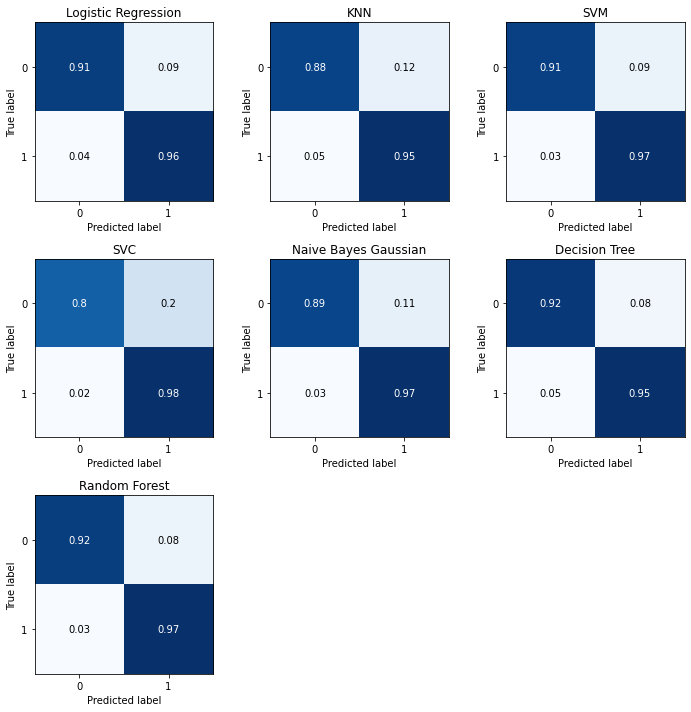

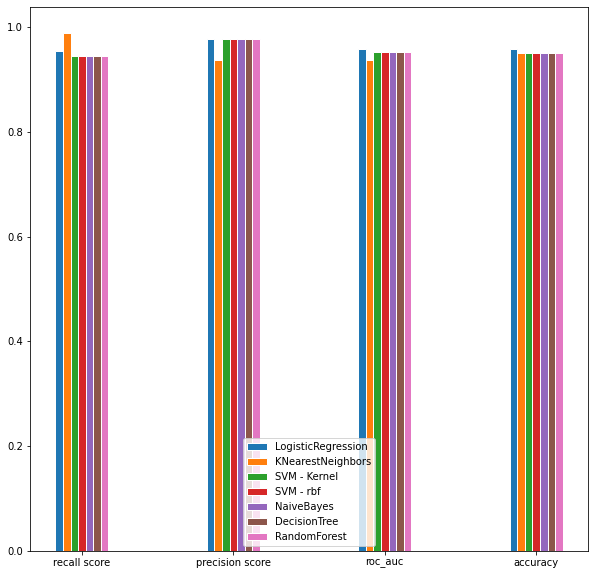

In [69]:
brst_cancer_ml_model  = BreastCancer()
brst_cancer_ml_model.preprocess_df()
brst_cancer_ml_model.train_ML_models()
brst_cancer_ml_model.compute_performance_evals()
brst_cancer_ml_model.cross_val_pred()